In [97]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('MyNFLDS.csv')

In [99]:
df = df.drop(columns=["T0 TDs", "T1 TDs", "T0 Field Goals", "T1 Field Goals", "T0 Points", "T1 Points", "Home Team"])

In [100]:
colInd = len(df.axes[1]) - 1
print(colInd)

26


In [101]:
dataset = df.values

In [102]:
dataset

array([[  4., 330., 134., ...,   0.,   2.,   1.],
       [  4., 451.,  56., ...,   3.,   8.,   0.],
       [  2., 236.,  57., ...,   0.,   2.,   1.],
       ...,
       [  2., 260.,  84., ...,   2.,   7.,   0.],
       [  3., 120.,  65., ...,   0.,   0.,   1.],
       [  0., 253.,  70., ...,   2.,   4.,   0.]])

In [103]:
X = dataset[:,0:colInd]

In [104]:
Y = dataset[:,colInd]

In [105]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [106]:
X_scale

array([[0.8       , 0.65853659, 0.45220588, ..., 0.67857143, 0.        ,
        0.22222222],
       [0.8       , 0.90447154, 0.16544118, ..., 0.57142857, 0.6       ,
        0.88888889],
       [0.4       , 0.46747967, 0.16911765, ..., 1.        , 0.        ,
        0.22222222],
       ...,
       [0.4       , 0.51626016, 0.26838235, ..., 0.07142857, 0.4       ,
        0.77777778],
       [0.6       , 0.23170732, 0.19852941, ..., 0.75      , 0.        ,
        0.        ],
       [0.        , 0.50203252, 0.21691176, ..., 0.21428571, 0.4       ,
        0.44444444]])

In [107]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size = 0.15)

In [108]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size = 0.5)

In [109]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(434, 26) (38, 26) (39, 26) (434,) (38,) (39,)


# Neural Network Model A

In [110]:
modelA = Sequential([
    Dense(8, activation = 'relu', input_shape = (colInd,)),
    Dense(8, activation = 'relu'),
    
    Dropout(.5),
    
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    
    Dense(1, activation = 'sigmoid'),])

In [111]:
modelA.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [112]:
hist = modelA.fit(X_train, Y_train, batch_size = 5, epochs = 75, validation_data = (X_val, Y_val))

Epoch 1/75
87/87 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.5645 - val_loss: 0.6834 - val_accuracy: 0.6053
Epoch 2/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5530 - val_loss: 0.6787 - val_accuracy: 0.6053
Epoch 3/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5530 - val_loss: 0.6761 - val_accuracy: 0.6053
Epoch 4/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5530 - val_loss: 0.6751 - val_accuracy: 0.6053
Epoch 5/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5530 - val_loss: 0.6737 - val_accuracy: 0.6053
Epoch 6/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5530 - val_loss: 0.6735 - val_accuracy: 0.6053
Epoch 7/75
87/87 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5530 - val_loss: 0.6732 - val_accuracy: 0.6053
Epoch 8/75
87/87 [==

# Neural Network Model B

In [159]:
modelB = Sequential([
    Dense(16, activation = 'relu', input_shape = (colInd,)),
    
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    
    #Dropout(0.25),
    
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'relu'),
    
    Dropout(0.25),
    
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    
    Dropout(0.15),
    
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(256, activation = 'relu'),
    
    Dense(1, activation = 'sigmoid'),])

In [160]:
modelB.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [161]:
hist = modelB.fit(X_train, Y_train, batch_size = 32, epochs = 500, validation_data = (X_val, Y_val))

Epoch 1/500
14/14 [==============================] - 1s 22ms/step - loss: 0.6926 - accuracy: 0.5484 - val_loss: 0.6909 - val_accuracy: 0.6053
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6918 - accuracy: 0.5530 - val_loss: 0.6895 - val_accuracy: 0.6053
Epoch 3/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5530 - val_loss: 0.6881 - val_accuracy: 0.6053
Epoch 4/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5530 - val_loss: 0.6871 - val_accuracy: 0.6053
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6902 - accuracy: 0.5530 - val_loss: 0.6862 - val_accuracy: 0.6053
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6899 - accuracy: 0.5530 - val_loss: 0.6852 - val_accuracy: 0.6053
Epoch 7/500
14/14 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5530 - val_loss: 0.6843 - val_accuracy: 0.6053
Epoch 8/500


In [ ]:
#DATADIR = '/users/hunte/NFLProject/modelA'
modelA.save("NFLmodelA")

# Linear SVM Model 1

In [575]:
from sklearn.svm import SVC
linSvc = SVC(kernel = 'linear', gamma = 'auto', probability = True)
linSvc.fit(X_train, Y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [576]:
from sklearn.metrics import accuracy_score
pred1 = linSvc.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(Y_test, pred1))

Accuracy on unknown data is 0.8461538461538461


C:\Users\hunte\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


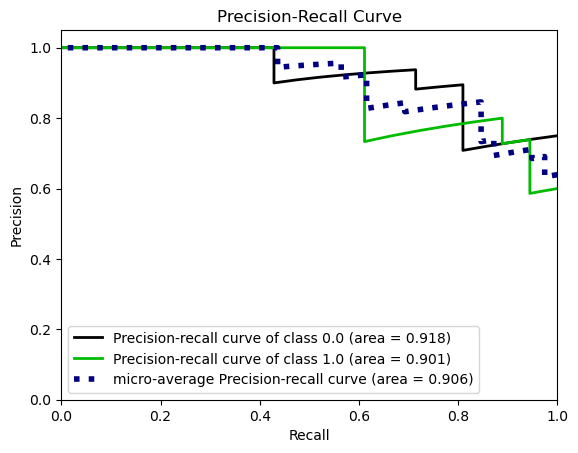

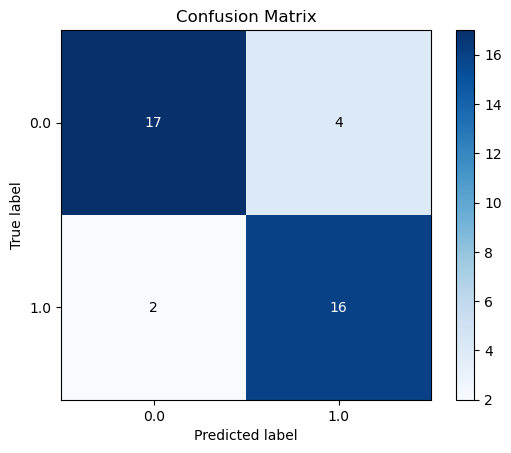

In [577]:
import os
#import cv2
import seaborn as sns
import scikitplot as skplt
prob = linSvc.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(Y_test, prob)
skplt.metrics.plot_confusion_matrix(Y_test, pred1)
plt.show()

# RBF SVM Model 1

In [581]:
rbfSvc = SVC(kernel = 'rbf', probability = True)
rbfSvc.fit(X_train, Y_train)

SVC(probability=True)

In [582]:
pred2 = rbfSvc.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(Y_test, pred2))

Accuracy on unknown data is 0.7948717948717948


In [583]:
prob2 = rbfSvc.predict_proba(X_test)

C:\Users\hunte\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


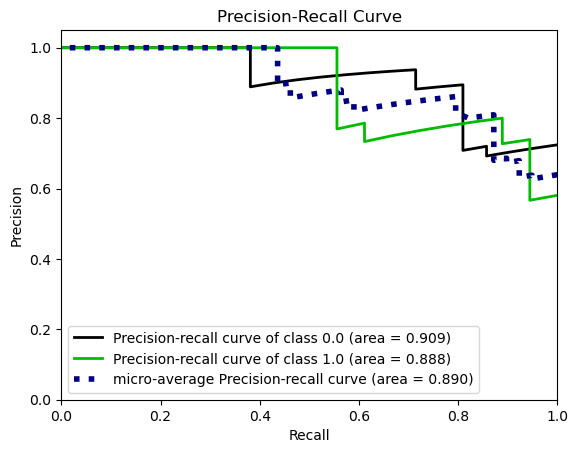

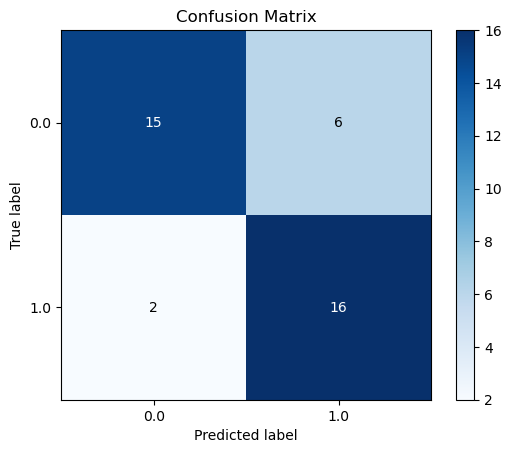

In [592]:
skplt.metrics.plot_precision_recall_curve(Y_test, prob2)
skplt.metrics.plot_confusion_matrix(Y_test, pred2)
plt.show()

# Polynomial SVM Model 1

In [609]:
polySvc = SVC(kernel = 'poly', degree = 3, gamma = 'auto', probability = True)
polySvc.fit(X_train, Y_train)

SVC(gamma='auto', kernel='poly', probability=True)

In [610]:
pred3 = polySvc.predict(X_test)
print("Accuracy on unknown data is",accuracy_score(Y_test, pred3))

Accuracy on unknown data is 0.46153846153846156


In [611]:
prob3 = polySvc.predict_proba(X_test)

C:\Users\hunte\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


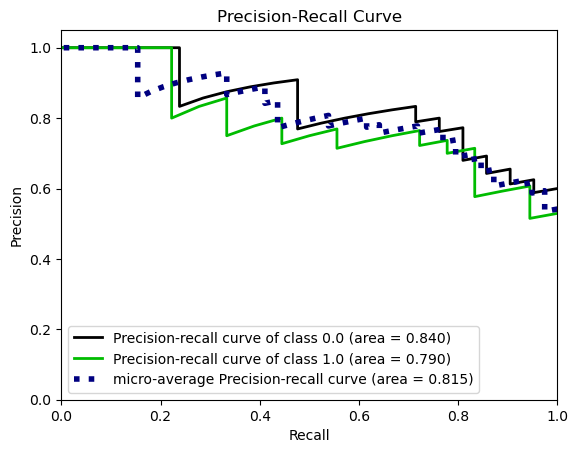

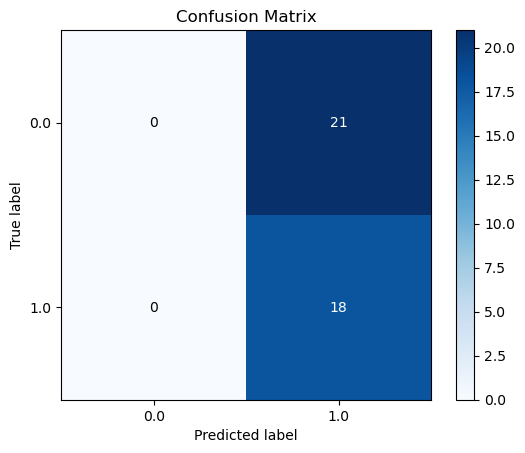

In [612]:
skplt.metrics.plot_precision_recall_curve(Y_test, prob3)
skplt.metrics.plot_confusion_matrix(Y_test, pred3)
plt.show()

You can see in the above confusion matrix the model simply chose the home team to win every time

# Random Forest Model 1

In [119]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

In [120]:
# create the classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [121]:
# predictin on the test set
y_pred = classifier.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score

# Calculate Model Accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.8461538461538461


In [137]:
dfList = df.columns.values.tolist()
dfList = dfList[:-1]

# Important Features from Random Forest Model

In [140]:
impRFFeatures = pd.DataFrame(
    {"feature": dfList, "importance": classifier.feature_importances_}
).sort_values("importance", ascending = False)

impRFFeatures

,feature,importance
17,T1 Avg Pass Yrds/Att,0.111612
15,T1 Rushing Yrds,0.075516
2,T0 Rushing Yrds,0.065281
4,T0 Avg Pass Yrds/Att,0.060031
25,T1 Sacked,0.051952
24,T1 Interceptions,0.050608
22,T1 TOP (min),0.047716
16,T1 Total Yrds,0.046809
9,T0 TOP (min),0.043188
20,T1 Total Plays,0.033004


# Feature Importance Scores
This is a test which uses Chi Squared

In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train, Y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dfList)
 
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(26,'Score'))

                   Specs      Score
24      T1 Interceptions  12.966951
11      T0 Interceptions   6.501019
25             T1 Sacked   6.249815
8            T0 Fum Lost   4.646171
15       T1 Rushing Yrds   4.373120
21           T1 Fum Lost   4.304341
2        T0 Rushing Yrds   3.987210
22          T1 TOP (min)   3.943935
12             T0 Sacked   3.921762
9           T0 TOP (min)   3.418169
13      T1 Wins % Last 5   3.019709
16         T1 Total Yrds   2.096341
4   T0 Avg Pass Yrds/Att   1.985895
0       T0 Wins % Last 5   1.588328
10        T0 First Downs   1.170118
23        T1 First Downs   1.097043
3          T0 Total Yrds   0.948816
17  T1 Avg Pass Yrds/Att   0.921513
19       T1 Penalty Yrds   0.334875
14       T1 Passing Yrds   0.206201
7         T0 Total Plays   0.188713
18  T1 Avg Rush Yrds/Att   0.111019
20        T1 Total Plays   0.023118
5   T0 Avg Rush Yrds/Att   0.011119
1        T0 Passing Yrds   0.005204
6        T0 Penalty Yrds   0.000194
